#importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import zipfile
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import svm

In [ ]:
from keras.datasets import fashion_mnist

fashion mnist dataset contains images of various items along with labels represented in the form of numbers where:
* 0: T-shirt/top
* 1: Trouser
* 2: Pullover
* 3: Dress
* 4: Coat
* 5: Sandal
* 6: Shirt
* 7: Sneaker
* 8: Bag
* 9: Ankle boot

In [ ]:
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


#Data Analysis and Exploration

##splitting into 80:20 ratio

In [ ]:
x1_train,x1_test,y1_train,y1_test=train_test_split(train_X,train_y,test_size=0.20,random_state=1)

##analyising data

In [ ]:
print(x1_train)
print(y1_train)
print(x1_test)
print(y1_test)

[[[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0  12 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   3   0]
  ...
  [ 66 112 136 ...  83 170  77]
  [  0   0   0 ... 107 105  10]
  [  0   0   0 ...   0   0   0]]

 ...

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   1   0   0]
  ...
  [  0   0   0 ...  67   0   0]
  [  0   0   0 ...  56   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0  

##Exploratory Data Analysis

In [ ]:
print(x1_train.shape)
print(y1_train.shape)
print(x1_test.shape)
print(y1_test.shape)

(48000, 28, 28)
(48000,)
(12000, 28, 28)
(12000,)


* so there are 48,000 images for training data hai 12,000 images for testing data of size 28x28 pixel size.
* now we need to check the range of pixels of each image

In [ ]:
print("range of pixels for training images is {} to {}".format(x1_train.min(),x1_train.max()))
print("range of pixels for testing images is {} to {}".format(x1_test.min(),x1_test.max()))
print("range of labels for training is format {} to {}".format(y1_train.min(),y1_train.max()))
print("range of labels for testing is format {} to {}".format(y1_test.min(),y1_test.max()))

range of pixels for training images is 0 to 255
range of pixels for testing images is 0 to 255
range of labels for training is format 0 to 9
range of labels for testing is format 0 to 9


where each label represents:
* 0: T-shirt/top
* 1: Trouser
* 2: Pullover
* 3: Dress
* 4: Coat
* 5: Sandal
* 6: Shirt
* 7: Sneaker
* 8: Bag
* 9: Ankle boot

##Data visualization

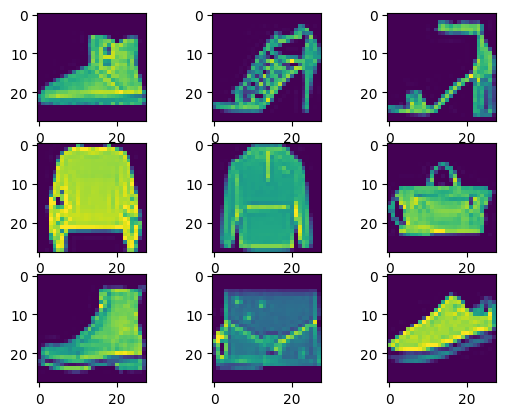

In [ ]:
for i in range(9):
 plt.subplot(3,3,i+1)
 plt.imshow(x1_train[i])

#performing augumentation

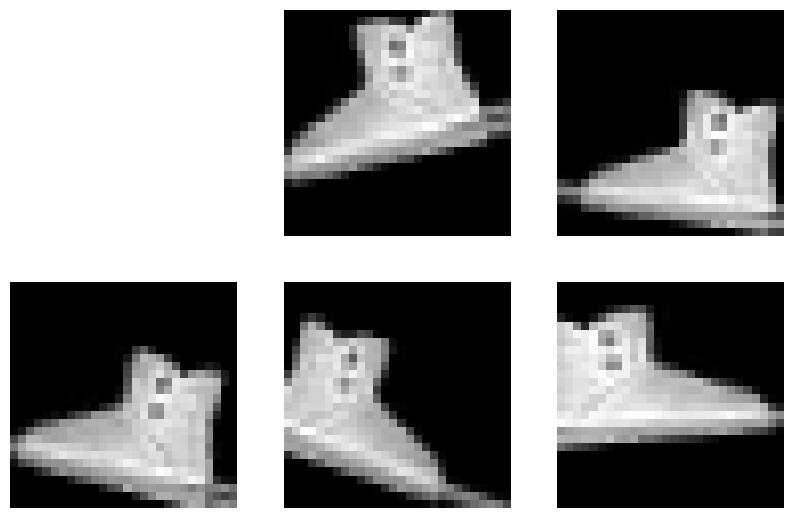

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_images = x1_train.astype('float32') / 255
test_images = x1_test.astype('float32') / 255

train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

augmented_samples = 5
index = 0

plt.figure(figsize=(10, 10))
for batch in datagen.flow(train_images[index:index+1], batch_size=1, save_to_dir='/content', save_prefix='aug', save_format='jpeg'):
    plt.subplot(3, 3, augmented_samples+1)
    plt.imshow(batch[0].reshape(28, 28), cmap='gray')
    plt.axis('off')
    augmented_samples -= 1
    if augmented_samples == 0:
        break

plt.show()



#Building SVM

In [ ]:
x1_train_flat=[]
for i in range(len(x1_train)):
  x1_train_flat.append(x1_train[i].flatten())

In [ ]:
x1_test_flat=[]
for i in range(len(x1_test)):
  x1_test_flat.append(x1_test[i].flatten())

In [ ]:
from sklearn import svm
from sklearn import preprocessing
train_x_scaled = preprocessing.scale(x1_train_flat)
test_x_scaled = preprocessing.scale(x1_test_flat)
clf = svm.SVC(kernel='linear', C=0.1)
clf.fit(train_x_scaled,y1_train)
pred_y = clf.predict(test_x_scaled)


In [ ]:
d={0:"T-shirt/top",
1:"Trouser",
2: "Pullover",
3: "Dress",
4: "Coat",
5: "Sandal",
6: "Shirt",
7: "Sneaker",
8: "Bag",
9: "Ankle boot"}
for i in list(pred_y):
  print(d[i])


Streaming output truncated to the last 5000 lines.
Ankle boot
Trouser
Ankle boot
Ankle boot
Sneaker
Sneaker
T-shirt/top
Bag
Pullover
Shirt
Pullover
Ankle boot
Ankle boot
Dress
Dress
Bag
T-shirt/top
Pullover
Bag
Dress
Dress
Dress
Trouser
Trouser
Sneaker
Pullover
Pullover
Sandal
Dress
Bag
Trouser
Trouser
T-shirt/top
T-shirt/top
Dress
Coat
T-shirt/top
Ankle boot
Bag
Pullover
Shirt
Bag
Bag
Ankle boot
Shirt
Pullover
Ankle boot
Pullover
Sandal
T-shirt/top
Shirt
Dress
Coat
Sneaker
Sandal
Sandal
Pullover
Shirt
T-shirt/top
Coat
Trouser
Bag
Sneaker
Sneaker
Shirt
Ankle boot
Pullover
Shirt
T-shirt/top
Sandal
Sneaker
Shirt
Pullover
Coat
Bag
Dress
Coat
Dress
Coat
T-shirt/top
Pullover
Sandal
Shirt
Trouser
Bag
Sandal
Coat
Shirt
Sandal
Bag
Bag
Pullover
T-shirt/top
Bag
T-shirt/top
T-shirt/top
Sneaker
Trouser
Coat
Sneaker
Shirt
Pullover
Sandal
Shirt
T-shirt/top
Pullover
Coat
T-shirt/top
Bag
Trouser
Coat
Pullover
Sandal
Sneaker
Dress
Trouser
Sneaker
Ankle boot
Pullover
Dress
Shirt
Coat
Coat
Pullover
Sanda

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_test, pred_y))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision Score : ", metrics.precision_score(y1_test, pred_y, average='macro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall Score : ", metrics.recall_score(y1_test, pred_y, average='macro'))

Accuracy: 0.8575
Precision Score :  0.8560449049889872
Recall Score :  0.8566273902381006


In [ ]:
print(classification_report(y1_test,pred_y, target_names=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]))

              precision    recall  f1-score   support

 T-shirt/top       0.77      0.85      0.81      1166
     Trouser       0.97      0.97      0.97      1213
    Pullover       0.76      0.75      0.75      1232
       Dress       0.86      0.87      0.86      1209
        Coat       0.74      0.80      0.77      1159
      Sandal       0.93      0.95      0.94      1217
       Shirt       0.67      0.59      0.63      1178
     Sneaker       0.92      0.94      0.93      1215
         Bag       0.97      0.92      0.94      1178
  Ankle boot       0.96      0.93      0.94      1233

    accuracy                           0.86     12000
   macro avg       0.86      0.86      0.86     12000
weighted avg       0.86      0.86      0.86     12000



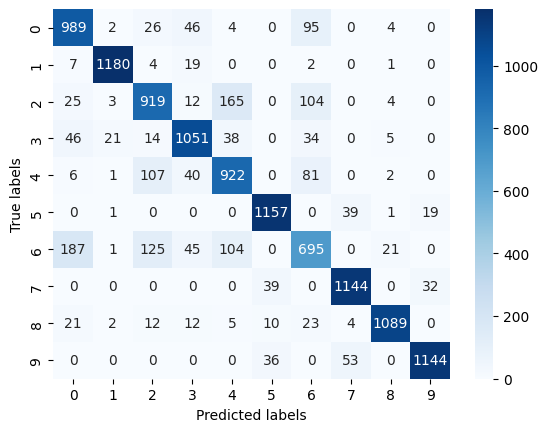

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y1_test, pred_y)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

##varying hyperparameters

In [ ]:
train_x_scaled = preprocessing.scale(x1_train_flat)
test_x_scaled = preprocessing.scale(x1_test_flat)
clf = svm.SVC(kernel='linear', C=0.1,gamma=0.01)
clf.fit(train_x_scaled,y1_train)
pred_y = clf.predict(test_x_scaled)

In [ ]:
d={0:"T-shirt/top",
1:"Trouser",
2: "Pullover",
3: "Dress",
4: "Coat",
5: "Sandal",
6: "Shirt",
7: "Sneaker",
8: "Bag",
9: "Ankle boot"}
for i in list(pred_y):
  print(d[i])


Streaming output truncated to the last 5000 lines.
Ankle boot
Trouser
Ankle boot
Ankle boot
Sneaker
Sneaker
T-shirt/top
Bag
Pullover
Shirt
Pullover
Ankle boot
Ankle boot
Dress
Dress
Bag
T-shirt/top
Pullover
Bag
Dress
Dress
Dress
Trouser
Trouser
Sneaker
Pullover
Pullover
Sandal
Dress
Bag
Trouser
Trouser
T-shirt/top
T-shirt/top
Dress
Coat
T-shirt/top
Ankle boot
Bag
Pullover
Shirt
Bag
Bag
Ankle boot
Shirt
Pullover
Ankle boot
Pullover
Sandal
T-shirt/top
Shirt
Dress
Coat
Sneaker
Sandal
Sandal
Pullover
Shirt
T-shirt/top
Coat
Trouser
Bag
Sneaker
Sneaker
Shirt
Ankle boot
Pullover
Shirt
T-shirt/top
Sandal
Sneaker
Shirt
Pullover
Coat
Bag
Dress
Coat
Dress
Coat
T-shirt/top
Pullover
Sandal
Shirt
Trouser
Bag
Sandal
Coat
Shirt
Sandal
Bag
Bag
Pullover
T-shirt/top
Bag
T-shirt/top
T-shirt/top
Sneaker
Trouser
Coat
Sneaker
Shirt
Pullover
Sandal
Shirt
T-shirt/top
Pullover
Coat
T-shirt/top
Bag
Trouser
Coat
Pullover
Sandal
Sneaker
Dress
Trouser
Sneaker
Ankle boot
Pullover
Dress
Shirt
Coat
Coat
Pullover
Sanda

In [ ]:
print("Accuracy:",metrics.accuracy_score(y1_test, pred_y))
print("Precision Score : ", metrics.precision_score(y1_test, pred_y, average='macro'))
print("Recall Score : ", metrics.recall_score(y1_test, pred_y, average='macro'))

Accuracy: 0.8575
Precision Score :  0.8560449049889872
Recall Score :  0.8566273902381006


In [ ]:
print(classification_report(y1_test,pred_y, target_names=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]))

              precision    recall  f1-score   support

 T-shirt/top       0.77      0.85      0.81      1166
     Trouser       0.97      0.97      0.97      1213
    Pullover       0.76      0.75      0.75      1232
       Dress       0.86      0.87      0.86      1209
        Coat       0.74      0.80      0.77      1159
      Sandal       0.93      0.95      0.94      1217
       Shirt       0.67      0.59      0.63      1178
     Sneaker       0.92      0.94      0.93      1215
         Bag       0.97      0.92      0.94      1178
  Ankle boot       0.96      0.93      0.94      1233

    accuracy                           0.86     12000
   macro avg       0.86      0.86      0.86     12000
weighted avg       0.86      0.86      0.86     12000



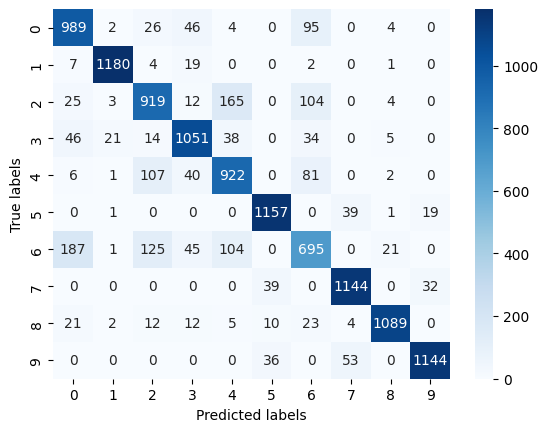

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y1_test, pred_y)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()